In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
#stylesheet for matplotlib
import matplotlib.patheffects as path_effects
import statsmodels.api as sm

In [2]:
#Import all 4 datasets (CSV, JSON & Excel format)
directory='./original_datasets/'
df1 = pd.read_json(directory+'2003_2017_waste.json')
df2 = pd.read_csv(directory + "2018_2021_waste.csv", sep=",")
df3 = pd.read_csv(directory + "waste_disposed_of_and_recycled_annual.csv", sep=",",na_values=[''])
formatted_path = directory+"volume_of_waste_disposed_in_singapore_2012_2021.xlsx"
df4 = pd.read_excel(formatted_path, 'Data', na_values=[''])

In [3]:
#Importing data.gov.sg website Data API as 5th dataset
resources={
    "NO2":"f8060108-f102-41e2-be12-fe264a34bba4",
    "PM2_5":"2e47ab6d-e327-4eb0-824f-e3ab6a5984db",
    "O3":"1bdc3a3e-27bd-4b5b-b13a-2e36528fb785"
}

data=[]

#Just state the max 64-bit number
limit=9223372036854775807

#Fetch each data in the resources and appending them to a list
for key in resources:
    url = f"https://data.gov.sg/api/action/datastore_search?resource_id={resources[key]}&limit={limit}"
    r=requests.get(url)
    data.append(pd.DataFrame(r.json().get('result').get('records')))
# print("Before Cleaning df5")
# print(data)
# print()

#Cleaning df5
newdata=[]
for i in range(len(data)):
    #Drop _id column for all 3 datadrame
    data[i]=data[i].drop(["_id"], axis=1)
    data[i]['year']=data[i]['year'].astype(int)
    #Get rows of data which year values are between 2003 and 2021
    data[i]=data[i].query('2003 <= year <= 2021')
    data[i]=data[i].reset_index(drop=True)
    newdata.append(data[i])

#Merge every dataframe in the array
df5 = pd.concat(newdata, axis=1)
#Check for missing values
print("df5")
print(df5.isnull().sum())
print()
print(df5.dtypes)
print()
#Reassign the dataset with the rows of data which columns are not duplicated
df5=df5.loc[:,~df5.columns.duplicated()]
df5=df5.set_index("year")
df5=df5.rename(columns={"nitrogen_dioxide_mean":"Nitrogen Dioxide", "pm2.5_mean":"Particulate Matter 2.5", "ozone_maximum_8hour_mean":"Ozone"})
df5[["Nitrogen Dioxide","Particulate Matter 2.5","Ozone"]]=df5[["Nitrogen Dioxide","Particulate Matter 2.5","Ozone"]].astype(int)
print(df5.dtypes)
display(df5)

df5
nitrogen_dioxide_mean       0
year                        0
pm2.5_mean                  0
year                        0
ozone_maximum_8hour_mean    0
year                        0
dtype: int64

nitrogen_dioxide_mean       object
year                         int32
pm2.5_mean                  object
year                         int32
ozone_maximum_8hour_mean    object
year                         int32
dtype: object

Nitrogen Dioxide          int32
Particulate Matter 2.5    int32
Ozone                     int32
dtype: object


,Nitrogen Dioxide,Particulate Matter 2.5,Ozone
year,,,
2003,24,19,118
2004,26,21,146
2005,25,21,159
2006,24,23,136
2007,22,19,206
2008,22,16,183
2009,22,19,105
2010,23,17,139
2011,25,17,123


In [4]:
#Check for missing values
print("df1")
print(df1.isnull().sum())
print()
#Check for missing values
print("df2")
print(df2.isnull().sum())
print()
#Check type of values in each column
print("df1")
print(df1.dtypes)
print()
#Check type of values in each column
print("df2")
print(df2.dtypes)
print()

#Cleaning dataframe 1
#Drop unwanted columns (These 2 columns don't exist in the other dataframe which I will merge with later)
print("df1 (before)")
display(df1)
df1=df1.drop(["recycling_rate","waste_disposed_of_tonne"], axis=1)
#Rename some of the columns names
df1=df1.rename(columns={"waste_type":"Waste Type", "total_waste_recycled_tonne":"Total Waste Recycled", "total_waste_generated_tonne":"Total Waste Generated"})
print("df1 (after)")
display(df1)

#Cleaning dataframe 2
#Renaming columns
print("df2 (before)")
display(df2.head(10))
df2=df2.rename(columns={"Total Generated ('000 tonnes)":"Total Waste Generated", "Total Recycled ('000 tonnes)":"Total Waste Recycled", "Year":"year"})
#Multiply each value in these two columns by 1000 as units is in 1000 tonnes to make it exact
df2[["Total Waste Generated","Total Waste Recycled"]]=df2[["Total Waste Generated","Total Waste Recycled"]].applymap(lambda x: x*1000)
print("df2 (after)")
display(df2.head(10))
print()

#Concat df1 and df2 to form a temp_merged 1 on axis=0
temp_merged1=pd.concat([df1,df2])
#Check type of values in each column
print("temp_merged1 (Before)")
print(temp_merged1.dtypes)
print()
#Sort values in ascending order by year & Waste Type
temp_merged1=temp_merged1.sort_values(by=["year","Waste Type"])
temp_merged1=temp_merged1.reset_index(drop=True)  #Reset index of merged dataset1
temp_merged1["Total Waste Recycled"]=temp_merged1["Total Waste Recycled"].astype(int) #Convert column type to int

print("temp_merged1 (After)")
print(temp_merged1.dtypes)
print()

display(temp_merged1)

df1
waste_type                     0
waste_disposed_of_tonne        0
total_waste_recycled_tonne     0
total_waste_generated_tonne    0
recycling_rate                 0
year                           0
dtype: int64

df2
Waste Type                       0
Total Generated ('000 tonnes)    0
Total Recycled ('000 tonnes)     0
Year                             0
dtype: int64

df1
waste_type                      object
waste_disposed_of_tonne          int64
total_waste_recycled_tonne       int64
total_waste_generated_tonne      int64
recycling_rate                 float64
year                             int64
dtype: object

df2
Waste Type                       object
Total Generated ('000 tonnes)     int64
Total Recycled ('000 tonnes)      int64
Year                              int64
dtype: object

df1 (before)


,waste_type,waste_disposed_of_tonne,total_waste_recycled_tonne,total_waste_generated_tonne,recycling_rate,year
0,Food,679900,111100,791000,0.14,2016
1,Paper/Cardboard,576000,607100,1183100,0.51,2016
2,Plastics,762700,59500,822200,0.07,2016
3,C&D,9700,1585700,1595400,0.99,2016
4,Horticultural waste,111500,209000,320500,0.65,2016
...,...,...,...,...,...,...
220,Ash and sludge,214800,28600,243400,0.12,2017
221,Plastic,763400,51800,815200,0.06,2017
222,Textile/Leather,141200,9600,150800,0.06,2017
223,"Others (stones, ceramic, rubber, etc.)",319300,7100,326400,0.02,2017


df1 (after)


,Waste Type,Total Waste Recycled,Total Waste Generated,year
0,Food,111100,791000,2016
1,Paper/Cardboard,607100,1183100,2016
2,Plastics,59500,822200,2016
3,C&D,1585700,1595400,2016
4,Horticultural waste,209000,320500,2016
...,...,...,...,...
220,Ash and sludge,28600,243400,2017
221,Plastic,51800,815200,2017
222,Textile/Leather,9600,150800,2017
223,"Others (stones, ceramic, rubber, etc.)",7100,326400,2017


df2 (before)


,Waste Type,Total Generated ('000 tonnes),Total Recycled ('000 tonnes),Year
0,Construction& Demolition,1624,1618,2018
1,Ferrous Metal,1269,126,2018
2,Paper/Cardboard,1054,586,2018
3,Plastics,949,41,2018
4,Food,763,126,2018
5,Wood,521,428,2018
6,Horticultural,320,227,2018
7,Ash & Sludge,240,25,2018
8,Textile/Leather,220,14,2018
9,Used Slag,181,179,2018


df2 (after)


,Waste Type,Total Waste Generated,Total Waste Recycled,year
0,Construction& Demolition,1624000,1618000,2018
1,Ferrous Metal,1269000,126000,2018
2,Paper/Cardboard,1054000,586000,2018
3,Plastics,949000,41000,2018
4,Food,763000,126000,2018
5,Wood,521000,428000,2018
6,Horticultural,320000,227000,2018
7,Ash & Sludge,240000,25000,2018
8,Textile/Leather,220000,14000,2018
9,Used Slag,181000,179000,2018



temp_merged1 (Before)
Waste Type               object
Total Waste Recycled      int64
Total Waste Generated     int64
year                      int64
dtype: object

temp_merged1 (After)
Waste Type               object
Total Waste Recycled      int32
Total Waste Generated     int64
year                      int64
dtype: object



,Waste Type,Total Waste Recycled,Total Waste Generated,year
0,Construction Debris,398300,422900,2003
1,Ferrous Metals,799000,856700,2003
2,Food waste,32900,548000,2003
3,Glass,6200,65500,2003
4,Horticultural Waste,119300,304600,2003
...,...,...,...,...
280,Plastics,58000,982000,2021
281,Scrap tyres,26000,27000,2021
282,Textile/Leather,7000,189000,2021
283,Used slag,181000,182000,2021


In [5]:
#Check for unique values of Waste Type column in temp_merged1
print("temp_merged1")
display(temp_merged1["Waste Type"].unique())

#Check for values in Waste Type column that starts with "C"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^C', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Construction Debris
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^C.*', 'Construction Debris', regex=True)
#Check for values in Waste Type column that starts with "C"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^C', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "Ot"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Ot', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Others (Stone, Ceramics & Rubber etc)
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^Ot.*', 'Others', regex=True)
#Check for values in Waste Type column that starts with "Ot"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Ot', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that contains "ludge"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'ludge', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Ash & Sludge
temp_merged1.loc[temp_merged1["Waste Type"].str.contains("ludge"), "Waste Type"]="Ash & Sludge"
#Check for values in Waste Type column that contains "ludge"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'ludge', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "Fe"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Fe', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Ferrous Metal
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^Fe.*', 'Ferrous Metal', regex=True)
#Check for values in Waste Type column that starts with "Fe"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Fe', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "N"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^N', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Non-Ferrous Metal
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^N.*', 'Non-Ferrous Metal', regex=True)
#Check for values in Waste Type column that starts with "N"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^N', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "U"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^U', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Used Slag
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^U.*', 'Used Slag', regex=True)
#Check for values in Waste Type column that starts with "U"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^U', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "F"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Fo', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Food
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^Fo.*', 'Food', regex=True)
#Check for values in Waste Type column that starts with "F"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Fo', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "H"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^H', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Horticultural
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^H.*', 'Horticultural', regex=True)
#Check for values in Waste Type column that starts with "H"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^H', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "Sc"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Sc', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Scrap Tyres
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^Sc.*', 'Scrap Tyres', regex=True)
#Check for values in Waste Type column that starts with "Sc"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Sc', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "W"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^W', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Wood
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^W.*', 'Wood', regex=True)
#Check for values in Waste Type column that starts with "W"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^W', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "Pl"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Pl', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Wood
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^Pl.*', 'Plastics', regex=True)
#Check for values in Waste Type column that starts with "Pl"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^Pl', regex=True)]["Waste Type"].unique())

#Check for values in Waste Type column that starts with "To"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^To', regex=True)]["Waste Type"].unique())
#Ensure similar naming convention for Overall
temp_merged1["Waste Type"] = temp_merged1["Waste Type"].str.replace(r'^To.*', 'Overall', regex=True)
#Check for values in Waste Type column that starts with "To"
# display(temp_merged1[temp_merged1["Waste Type"].str.contains(r'^To', regex=True)]["Waste Type"].unique())

#Filter rows of data that Waste Type matches only Overall to concat w temp_merged2 later to form final2 dataset
specific_category=temp_merged1[temp_merged1["Waste Type"].isin(["Overall"])]
#Set year column as dataframe index
specific_category=specific_category.set_index(["year"])
# display(specific_category)

#Drop Rows that Waste Type Column contains "Overall"
#Set year as index of merged_dataset 1
mask=temp_merged1["Waste Type"] == "Overall"
temp_merged1 = temp_merged1[~mask].set_index(["year"])

#Check for unique values of Waste Type column in temp_merged1
display(temp_merged1["Waste Type"].unique())
print("temp_merged1")
display(temp_merged1.head(14))

temp_merged1


array(['Construction Debris', 'Ferrous Metals', 'Food waste', 'Glass',
       'Horticultural Waste', 'Non-ferrous Metals',
       'Others (stones, ceramics & rubber etc)', 'Paper/Cardboard',
       'Plastics', 'Scrap Tyres', 'Sludge', 'Textile/Leather', 'Total',
       'Used Slag', 'Wood/Timber', 'Others', 'Ferrous Metal',
       'Ash & Sludge', 'C&D', 'Ferrous metal', 'Food',
       'Horticultural waste', 'Non-ferrous metal', 'Scrap tyres',
       'Used slag', 'Wood', 'Others (stones, ceramics & rubber etc.)',
       'Ash and sludge', 'Construction debris', 'Non-ferrous metals',
       'Others (stones, ceramic, rubber, etc.)', 'Plastic',
       'Construction& Demolition', 'Horticultural', 'Non-Ferrous Metal',
       'Others (stones, ceramic, rubber, ect)', 'Overall', 'Ash & sludge',
       'Construction & Demolition', 'Others (stones, ceramics, etc.)'],
      dtype=object)

array(['Construction Debris', 'Ferrous Metal', 'Food', 'Glass',
       'Horticultural', 'Non-Ferrous Metal', 'Others', 'Paper/Cardboard',
       'Plastics', 'Scrap Tyres', 'Ash & Sludge', 'Textile/Leather',
       'Used Slag', 'Wood'], dtype=object)

temp_merged1


,Waste Type,Total Waste Recycled,Total Waste Generated
year,,,
2003,Construction Debris,398300,422900
2003,Ferrous Metal,799000,856700
2003,Food,32900,548000
2003,Glass,6200,65500
2003,Horticultural,119300,304600
2003,Non-Ferrous Metal,75800,93900
2003,Others,0,103800
2003,Paper/Cardboard,466200,1084700
2003,Plastics,39100,579900


Waste Type,Ash & Sludge,Construction Debris,Ferrous Metal,Food,Glass,Horticultural,Non-Ferrous Metal,Others,Paper/Cardboard,Plastics,Scrap Tyres,Textile/Leather,Used Slag,Wood
year,,,,,,,,,,,,,,
2003,0,398300,799000,32900,6200,119300,75800,0,466200,39100,6200,900,238500,40800
2004,0,471000,649900,31100,4900,127900,71800,11000,519900,74100,7200,5000,259600,73700
2005,0,465300,749100,36500,3800,101000,74700,8800,540500,86000,10800,4000,298900,90000
2006,0,604000,657400,44700,6400,87000,70700,15300,571400,77800,19400,4100,417000,81700
2007,0,759300,668000,51200,5800,91100,75600,14000,619000,75000,22000,6000,520000,127800
2008,0,900000,735000,68000,10000,96000,72000,8000,608600,61200,22100,11000,560500,190200
2009,0,1150700,806200,76700,15600,93500,47500,3200,574200,60300,18700,12600,418600,207400
2010,0,912400,1127500,102400,19200,99200,73100,3800,738200,78100,20000,14700,378900,190000
2011,0,1191100,1171600,69700,21400,89000,102800,3200,765000,77000,18300,17300,335900,176500


Waste Type,Ash & Sludge,Construction Debris,Ferrous Metal,Food,Glass,Horticultural,Non-Ferrous Metal,Others,Paper/Cardboard,Plastics,Scrap Tyres,Textile/Leather,Used Slag,Wood
count,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
mean,10842.0,1081647.0,1007411.0,88942.0,11779.0,158358.0,93289.0,8747.0,584695.0,64363.0,21389.0,10158.0,313953.0,217905.0
std,12209.0,419929.0,358299.0,37937.0,5287.0,72082.0,30932.0,5690.0,96694.0,17493.0,7854.0,5251.0,121925.0,108278.0
min,0.0,398300.0,126000.0,31100.0,3800.0,87000.0,47500.0,0.0,432000.0,36000.0,6200.0,900.0,104000.0,40800.0
25%,0.0,790650.0,742050.0,59600.0,6700.0,97600.0,73050.0,4650.0,530200.0,54800.0,18500.0,6000.0,242750.0,152150.0
50%,0.0,1150700.0,1127500.0,100000.0,12000.0,120900.0,87000.0,7100.0,586000.0,61200.0,22000.0,10900.0,335900.0,207400.0
75%,23500.0,1418450.0,1332250.0,118550.0,15150.0,223850.0,100050.0,12500.0,632750.0,77950.0,27500.0,14350.0,372350.0,291200.0
max,28600.0,1683000.0,1388900.0,154000.0,21400.0,293000.0,170000.0,21000.0,765000.0,91100.0,33000.0,18300.0,560500.0,428000.0


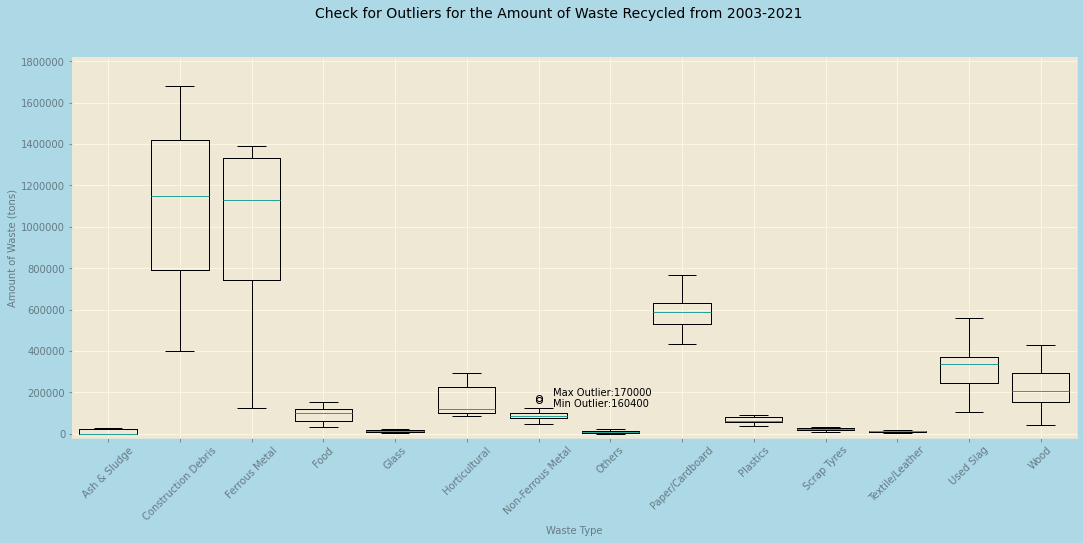

Year with the Max Outlier: 2018
Year with the Min Outlier: 2015

Year with max Ash & Sludge recycled: 2017
Year with min Ash & Sludge recycled: 2003

Year with max Construction Debris recycled: 2013
Year with min Construction Debris recycled: 2003

Year with max Ferrous Metal recycled: 2014
Year with min Ferrous Metal recycled: 2018

Year with max Food recycled: 2021
Year with min Food recycled: 2004

Year with max Glass recycled: 2011
Year with min Glass recycled: 2005

Year with max Horticultural recycled: 2019
Year with min Horticultural recycled: 2006

Year with max Non-Ferrous Metal recycled: 2018
Year with min Non-Ferrous Metal recycled: 2009

Year with max Others recycled: 2020
Year with min Others recycled: 2003

Year with max Paper/Cardboard recycled: 2011
Year with min Paper/Cardboard recycled: 2020

Year with max Plastics recycled: 2013
Year with min Plastics recycled: 2020

Year with max Scrap Tyres recycled: 2017
Year with min Scrap Tyres recycled: 2003

Year with max Text

In [6]:
#Reshape temp_merged1 dataframe such that the columns are Waste Type, values are the Total Waste Recycled
final1_recycled=temp_merged1.pivot(columns="Waste Type", values="Total Waste Recycled")
display(final1_recycled)

#Save final cleaned dataset
final1_recycled.to_csv('./processed_datasets/Total_WasteType_Recycled_2003to2021.csv')

#Show analysis of distribution for waste type recycled
display(final1_recycled.describe().round(0))

#Use a stylesheet for the graph
plt.style.use('Solarize_Light2')
#Plotting a boxplot to see distribution of how waste are recycled for each waste type
fig3=plt.figure(1,figsize=(18,7))
fig3.set_facecolor("lightblue")
ax3=plt.subplot(111)
#Plotting scale range for y-axis
ax3.set_ylim(-20000,1820000)
ax3.set_yticks(np.arange(0,1801000, 200000))
ax3.set_yticklabels(np.arange(0,1801000, 200000))
boxplot2 = ax3.boxplot(final1_recycled, labels=final1_recycled.columns, widths=0.8)
plt.xlabel("Waste Type", fontsize=10)
plt.ylabel("Amount of Waste (tons)", fontsize=10)
plt.xticks(rotation=45)
fig3.suptitle('Check for Outliers for the Amount of Waste Recycled from 2003-2021', fontsize=14)
#Get min and max outliers for Non-Ferrous Metal as seen in the boxplot that it is the only category with outliers
ndarray = boxplot2['fliers'][6].get_xydata()
if (len(ndarray)>0): # will be 0 when no fliers
    max_flier = ndarray[:,1].max()
    max_flier_index = ndarray[:,1].argmax()      
    x = ndarray[max_flier_index,0]
    y = ndarray[max_flier_index,1]    
    plt.text(x+0.2,y+15000,f'Max Outlier:{int(max_flier)}')
    min_flier = ndarray[:,1].min()
    min_flier_index = ndarray[:,1].argmin()      
    mx = ndarray[min_flier_index,0]
    my = ndarray[min_flier_index,1]
    plt.text(mx+0.2,my-30000,f'Min Outlier:{int(min_flier)}')
plt.show()

#Reveal the years that contains the max and min outliers
year_w_maxOutlier=final1_recycled[final1_recycled["Non-Ferrous Metal"]==max_flier].index[0]
print(f"Year with the Max Outlier: {year_w_maxOutlier}")
year_w_minOutlier=final1_recycled[final1_recycled["Non-Ferrous Metal"]==min_flier].index[0]
print(f"Year with the Min Outlier: {year_w_minOutlier}")
print()

#Show the years that have the min and max waste recycled for each waste type
for waste in final1_recycled.columns:
    print(f'Year with max {waste} recycled: {final1_recycled[waste].idxmax()}')
    print(f'Year with min {waste} recycled: {final1_recycled[waste].idxmin()}')
    print()



Waste Type,Ash & Sludge,Construction Debris,Ferrous Metal,Food,Glass,Horticultural,Non-Ferrous Metal,Others,Paper/Cardboard,Plastics,Scrap Tyres,Textile/Leather,Used Slag,Wood
year,,,,,,,,,,,,,,
2003,88500,422900,856700,548000,65500,304600,93900,103800,1084700,579900,14400,91600,260300,213400
2004,93900,509000,720200,531100,73600,227000,86900,114100,1132100,683100,14700,114500,267200,222300
2005,98300,492500,818300,531500,62600,199500,89400,225200,1098600,674800,16800,89000,382400,239300
2006,126800,619000,725900,542700,63000,231000,86700,242300,1116300,656800,23900,91800,470600,223700
2007,124600,778300,736500,558900,65300,224600,92300,248600,1202900,659800,25500,110100,527200,246200
2008,114600,922000,784800,568000,57100,229300,85000,308300,1262500,684400,25100,93300,566200,269600
2009,88900,1175800,872000,606100,73100,238100,57600,270900,1201000,688900,22600,109100,422400,287600
2010,114400,921800,1194600,640500,79900,251000,85500,307400,1383900,740400,24000,120900,382700,270000
2011,152900,1203700,1239200,675500,72800,238800,117300,328400,1368200,733000,22000,131000,341600,273900


Waste Type,Ash & Sludge,Construction Debris,Ferrous Metal,Food,Glass,Horticultural,Non-Ferrous Metal,Others,Paper/Cardboard,Plastics,Scrap Tyres,Textile/Leather,Used Slag,Wood
count,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
mean,165153.0,1095805.0,1109153.0,677126.0,70453.0,278863.0,105342.0,272537.0,1182411.0,778774.0,24963.0,136737.0,326311.0,325711.0
std,60389.0,414100.0,276162.0,108182.0,6194.0,55018.0,31232.0,79696.0,97422.0,112329.0,6535.0,35969.0,126117.0,95808.0
min,88500.0,422900.0,720200.0,531100.0,57100.0,199500.0,57600.0,103800.0,1011000.0,579900.0,14400.0,89000.0,106000.0,213400.0
25%,114500.0,801650.0,837500.0,563450.0,65400.0,234550.0,86800.0,229100.0,1124200.0,683750.0,21800.0,109600.0,255700.0,257900.0
50%,152900.0,1175800.0,1239200.0,675500.0,72800.0,252600.0,93700.0,286000.0,1183100.0,803400.0,24000.0,137000.0,353700.0,304000.0
75%,227650.0,1425900.0,1353000.0,787050.0,74450.0,320250.0,120450.0,331600.0,1244700.0,850100.0,29500.0,157650.0,382550.0,369250.0
max,252000.0,1695300.0,1445900.0,817000.0,79900.0,400000.0,180000.0,382500.0,1383900.0,982000.0,35900.0,220000.0,566200.0,530700.0


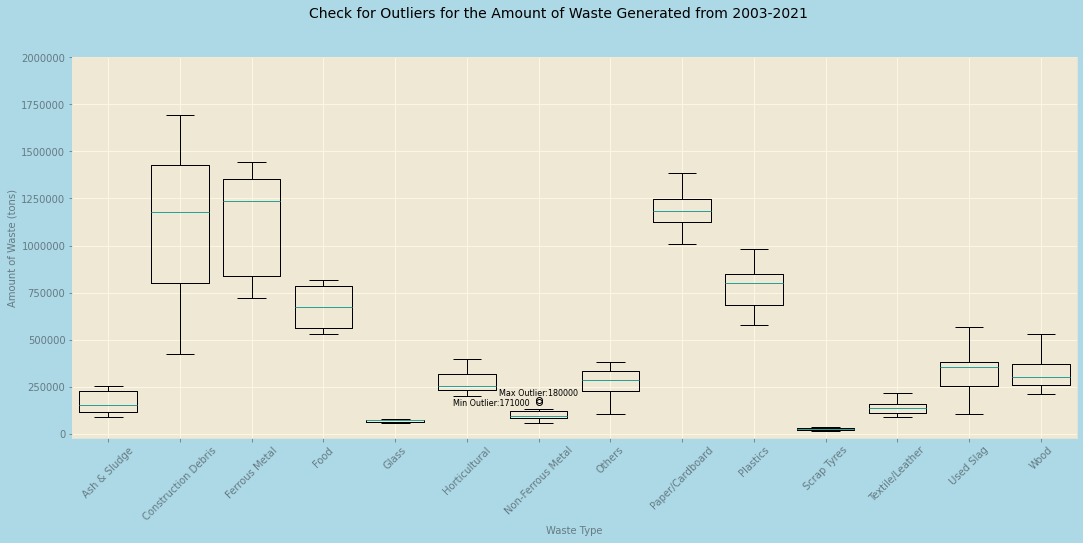

Year with the Max Outlier: 2015
Year with the Min Outlier: 2018

Year with max Ash & Sludge recycled: 2019
Year with min Ash & Sludge recycled: 2003

Year with max Construction Debris recycled: 2013
Year with min Construction Debris recycled: 2003

Year with max Ferrous Metal recycled: 2014
Year with min Ferrous Metal recycled: 2004

Year with max Food recycled: 2021
Year with min Food recycled: 2004

Year with max Glass recycled: 2010
Year with min Glass recycled: 2008

Year with max Horticultural recycled: 2019
Year with min Horticultural recycled: 2005

Year with max Non-Ferrous Metal recycled: 2015
Year with min Non-Ferrous Metal recycled: 2009

Year with max Others recycled: 2016
Year with min Others recycled: 2003

Year with max Paper/Cardboard recycled: 2010
Year with min Paper/Cardboard recycled: 2019

Year with max Plastics recycled: 2021
Year with min Plastics recycled: 2003

Year with max Scrap Tyres recycled: 2017
Year with min Scrap Tyres recycled: 2003

Year with max Text

In [7]:
#Reshape temp_merged1 dataframe such that the columns are Waste Type, values are the Total Waste Generated
final1_generated=temp_merged1.pivot(columns="Waste Type", values="Total Waste Generated")
display(final1_generated)

#Save final cleaned dataset
final1_generated.to_csv('./processed_datasets/Total_WasteType_Generated_2003to2021.csv')

#Show analysis of distribution and outliers for waste type generated
display(final1_generated.describe().round(0))

fig4=plt.figure(1,figsize=(18,7))
fig4.set_facecolor("lightblue")
ax4=plt.subplot(111)
boxplot3 = ax4.boxplot(final1_generated, labels=final1_generated.columns, widths=0.8)
plt.xlabel("Waste Type", fontsize=10)
plt.ylabel("Amount of Waste (tons)", fontsize=10)
plt.xticks(rotation=45)
#Plotting scale range for y-axis
ax4.set_ylim(-20000,2000050)
ax4.set_yticks(np.arange(0,2000050, 250000))
ax4.set_yticklabels(np.arange(0,2000050, 250000))
fig4.suptitle('Check for Outliers for the Amount of Waste Generated from 2003-2021', fontsize=14)

#Get min and max outliers for Non-Ferrous Metal as seen in the boxplot that it is the only category with outliers
ndarray = boxplot3['fliers'][6].get_xydata()
if (len(ndarray)>0): # will be 0 when no fliers
    max_flier = ndarray[:,1].max()
    max_flier_index = ndarray[:,1].argmax()      
    x = ndarray[max_flier_index,0]
    y = ndarray[max_flier_index,1]    
    plt.text(x-0.55,y+25000,f'Max Outlier:{int(max_flier)}', fontsize=8)
    min_flier = ndarray[:,1].min()
    min_flier_index = ndarray[:,1].argmin()      
    mx = ndarray[min_flier_index,0]
    my = ndarray[min_flier_index,1]
    plt.text(mx-1.19,my-18000,f'Min Outlier:{int(min_flier)}', fontsize=8)
plt.show()

#Reveal the years that contains the max and min outliers
year_w_maxOutlier=final1_generated[final1_generated["Non-Ferrous Metal"]==max_flier].index[0]
print(f"Year with the Max Outlier: {year_w_maxOutlier}")
year_w_minOutlier=final1_generated[final1_generated["Non-Ferrous Metal"]==min_flier].index[0]
print(f"Year with the Min Outlier: {year_w_minOutlier}")
print()

#Show the years that have the min and max waste generated for each waste type
for waste in final1_generated.columns:
    print(f'Year with max {waste} recycled: {final1_generated[waste].idxmax()}')
    print(f'Year with min {waste} recycled: {final1_generated[waste].idxmin()}')
    print()

Waste Type
Ash & Sludge            16000
Construction Debris    822000
Ferrous Metal          930000
Food                   126000
Glass                    7000
Horticultural          249000
Non-Ferrous Metal       73000
Others                  21000
Paper/Cardboard        432000
Plastics                36000
Scrap Tyres             22000
Textile/Leather          6000
Used Slag              104000
Wood                   195000
Name: 2020, dtype: int32

Waste Type
Ash & Sludge            228000
Construction Debris     825000
Ferrous Metal           934000
Food                    665000
Glass                    66000
Horticultural           313000
Non-Ferrous Metal        75000
Others                  193000
Paper/Cardboard        1144000
Plastics                868000
Scrap Tyres              23000
Textile/Leather         137000
Used Slag               106000
Wood                    304000
Name: 2020, dtype: int64

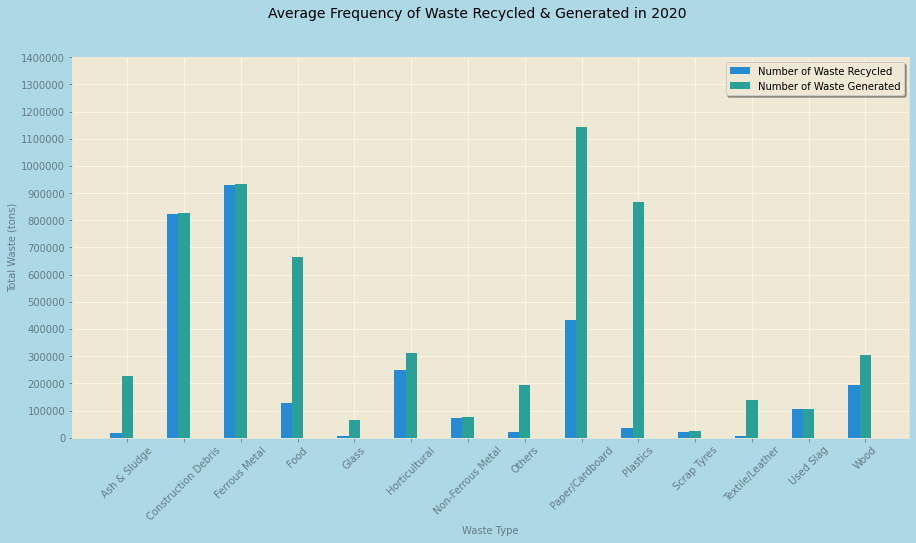

In [8]:
#Plots grouped bar chart of waste type recycled and generated in year 2020
waste_typecount=np.arange(len(final1_recycled.columns))
fig7=plt.figure(1,figsize=(15,7))
fig7.set_facecolor("lightblue")
ax7=plt.subplot(111)
display(final1_recycled.iloc[-2])
display(final1_generated.iloc[-2])
#Plot each bar in the bargraph
ax7.bar(waste_typecount-0.2, final1_recycled.iloc[-2], label='Number of Waste Recycled', width=0.2)
ax7.bar(waste_typecount, final1_generated.iloc[-2], label='Number of Waste Generated', width=0.2)
#Set labels for x-axis
ax7.set_xticks(np.arange(len(final1_recycled.columns)))
ax7.set_xticklabels(final1_recycled.columns, rotation=45)
ax7.set_ylim(0,1400050)
ax7.set_yticks(np.arange(0,1400050, 100000))
ax7.set_yticklabels(np.arange(0,1400050, 100000))
legend = ax7.legend(loc='upper right', shadow=True, fancybox=True)
plt.xlabel("Waste Type", fontsize=10)
plt.ylabel("Total Waste (tons)", fontsize=10)
fig7.suptitle('Average Frequency of Waste Recycled & Generated in 2020', fontsize=14)

plt.show()

Waste Type
Ash & Sludge             22000
Construction Debris    1011000
Ferrous Metal          1306000
Food                    154000
Glass                     9000
Horticultural           277000
Non-Ferrous Metal        87000
Others                   18000
Paper/Cardboard         437000
Plastics                 58000
Scrap Tyres              26000
Textile/Leather           7000
Used Slag               181000
Wood                    234000
Name: 2021, dtype: int32

Waste Type
Ash & Sludge            249000
Construction Debris    1013000
Ferrous Metal          1312000
Food                    817000
Glass                    74000
Horticultural           332000
Non-Ferrous Metal        88000
Others                  233000
Paper/Cardboard        1136000
Plastics                982000
Scrap Tyres              27000
Textile/Leather         189000
Used Slag               182000
Wood                    310000
Name: 2021, dtype: int64

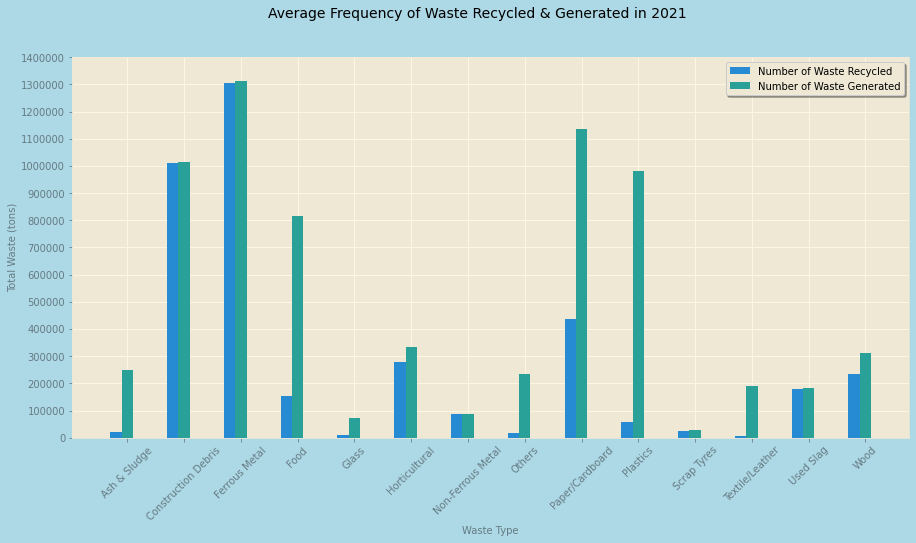

In [9]:
#Plots grouped bar chart of waste type recycled and generated in year 2021
waste_typecount=np.arange(len(final1_recycled.columns))
fig6=plt.figure(1,figsize=(15,7))
fig6.set_facecolor("lightblue")
ax6=plt.subplot(111)
display(final1_recycled.iloc[-1])
display(final1_generated.iloc[-1])
#Plot each bar in the bargraph
ax6.bar(waste_typecount-0.2, final1_recycled.iloc[-1], label='Number of Waste Recycled', width=0.2)
ax6.bar(waste_typecount, final1_generated.iloc[-1], label='Number of Waste Generated', width=0.2)
#Set labels for x-axis
ax6.set_xticks(np.arange(len(final1_recycled.columns)))
ax6.set_xticklabels(final1_recycled.columns, rotation=45)
ax6.set_ylim(0,1400050)
ax6.set_yticks(np.arange(0,1400050, 100000))
ax6.set_yticklabels(np.arange(0,1400050, 100000))
legend = ax6.legend(loc='upper right', shadow=True, fancybox=True)
plt.xlabel("Waste Type", fontsize=10)
plt.ylabel("Total Waste (tons)", fontsize=10)
fig6.suptitle('Average Frequency of Waste Recycled & Generated in 2021', fontsize=14)

plt.show()

In [10]:
#Cleaning dataframe 3
#Check for missing values
print(df3.isnull().sum())
print()
#Check type of values in each column
print("df3")
print(df3.dtypes)
print()
print(df3)
#Drop unwanted columns and rows as previous dataframe already contains those information
df3=df3.drop(df3.index[:3])
df3=df3.drop(df3.index[9:])
df3=df3.set_index(["year"])
df3=df3.rename(columns={"waste_disposed_of":"Total Waste Disposed"})
#Fill up missing values with interpolation as it can estimate missing value in the same increasing order as the previous values
df3["Total Waste Disposed"]=df3["Total Waste Disposed"].interpolate()
#Drop the entire column as there will be merging of another dataframe to join the waste recycled and generated
df3=df3.drop(["waste_recycled"], axis=1)
#Format the same magnitude for all the values
df3["Total Waste Disposed"]=df3["Total Waste Disposed"].apply(lambda x: x*1000000)
df3["Total Waste Disposed"]=df3["Total Waste Disposed"].astype(int)
print(df3.dtypes)
print("df3")
display(df3)

year                 0
waste_disposed_of    1
waste_recycled       1
dtype: int64

df3
year                   int64
waste_disposed_of    float64
waste_recycled       float64
dtype: object

    year  waste_disposed_of  waste_recycled
0   2000               2.80            1.86
1   2001               2.80            2.23
2   2002               2.63            2.18
3   2003               2.51            2.22
4   2004               2.48             NaN
5   2005               2.55            2.47
6   2006               2.56            2.66
7   2007               2.57            3.03
8   2008               2.62            3.34
9   2009               2.63            3.49
10  2010                NaN            3.76
11  2011               2.86            4.04
12  2012               2.93            4.34
13  2013               3.02            4.83
14  2014               3.04            4.47
Total Waste Disposed    int32
dtype: object
df3


,Total Waste Disposed
year,
2003,2510000
2004,2480000
2005,2550000
2006,2560000
2007,2570000
2008,2620000
2009,2630000
2010,2745000
2011,2860000


In [11]:
#Cleaning dataframe 4
# display(df4)
#Check for missing values
# print(df4.isnull().sum())
# print()

#Drop column and rows with missing data due to the how file is formatted
df4=df4.drop(['Unnamed: 0'], axis=1)
df4=df4.drop(df4.index[:4])
#Reset index after dropping it and ensure that the old index does not appear as a new column
df4=df4.reset_index(drop=True)

#Rename columns
df4=df4.rename(columns={"Unnamed: 1":"year","Unnamed: 2":"Domestic Waste Disposed","Unnamed: 3":"Non-Domestic Waste Disposed"})

#Check type of values in each column
print("df4")
print(df4.dtypes)
print()
# display(df4)
# print()

#Set year column as dataframe index
df4=df4.set_index(["year"])

#Convert column values to actual million tones and assign a new column to it
newcolumn=(df4["Domestic Waste Disposed"] + df4["Non-Domestic Waste Disposed"])*1000000
df4=df4.assign(Total_Waste_Disposed = newcolumn)

#Rename column name as assign method cannot take white space as parameter
df4=df4.rename(columns={"Total_Waste_Disposed":"Total Waste Disposed"})
df4["Total Waste Disposed"]=df4["Total Waste Disposed"].astype(int) #Convert column type to int

#Drop these two columns as there is a lot of missing data from 2003-2011 after concatenating df4 and df3
df4=df4.drop(['Domestic Waste Disposed','Non-Domestic Waste Disposed'], axis=1)
print("df4")
# display(df4)

#Concatenate a new dataframe with df3 and df4
temp_merged2=pd.concat([df3,df4])
#Check for missing values
print(temp_merged2.isnull().sum())
print()
#Check type of values in each column
# print(temp_merged2.dtypes)
# print()
# print("temp_merged2")
# display(temp_merged2)
# display(specific_category)
#Concatenate temp_merged2 and specific_category to get a new formulatted dataframe
final2=pd.concat([specific_category, temp_merged2], axis=1)

#To show data before countering
# display(final2)
#Counter merging/concat problem
final2.iloc[9:19,3]=final2.iloc[19:,3]
final2=final2.drop(final2.tail(10).index)
final2=final2.drop(["Waste Type"], axis=1)
final2=pd.DataFrame(final2)
final2[["Total Waste Recycled","Total Waste Generated","Total Waste Disposed"]]=final2[["Total Waste Recycled","Total Waste Generated","Total Waste Disposed"]].astype(int)

#merge df5 with final2 dataset
final2=pd.concat([final2, df5], axis=1)
#Save final cleaned dataset
final2.to_csv('./processed_datasets/Total_Waste_Statistics_2003to2021.csv')
#After countering issue
display(final2)
print(final2.dtypes)

df4
year                           object
Domestic Waste Disposed        object
Non-Domestic Waste Disposed    object
dtype: object

df4
Total Waste Disposed    0
dtype: int64



,Total Waste Recycled,Total Waste Generated,Total Waste Disposed,Nitrogen Dioxide,Particulate Matter 2.5,Ozone
year,,,,,,
2003,2223200,4728200,2510000,24,19,118
2004,2307100,4789700,2480000,26,21,146
2005,2469400,5018200,2550000,25,21,159
2006,2656900,5220500,2560000,24,23,136
2007,3034800,5600800,2570000,22,19,206
2008,3342600,5970200,2620000,22,16,183
2009,3485200,6114100,2630000,22,19,105
2010,3757500,6517000,2745000,23,17,139
2011,4038800,6898300,2860000,25,17,123


Total Waste Recycled      int32
Total Waste Generated     int32
Total Waste Disposed      int32
Nitrogen Dioxide          int32
Particulate Matter 2.5    int32
Ozone                     int32
dtype: object


,Total Waste Recycled,Total Waste Generated,Total Waste Disposed,Nitrogen Dioxide,Particulate Matter 2.5,Ozone
count,19.0,19.0,19.0,19.0,19.0,19.0
mean,3733163.0,6549342.0,2815000.0,24.0,18.0,146.0
std,900635.0,1100476.0,218371.0,2.0,3.0,27.0
min,2223200.0,4728200.0,2480000.0,20.0,11.0,105.0
25%,3037400.0,5740400.0,2595000.0,22.0,16.0,124.0
50%,3826000.0,6898300.0,2860000.0,24.0,18.0,139.0
75%,4560400.0,7594000.0,3005000.0,25.0,20.0,156.0
max,4825900.0,7851500.0,3120000.0,26.0,24.0,206.0


Year with the max total waste generated: 2013
Year with the min total waste generated: 2003
Year with the max total waste recycled: 2013
Year with the min total waste recycled: 2003
Year with the max total waste disposed: 2021
Year with the min total waste disposed: 2004


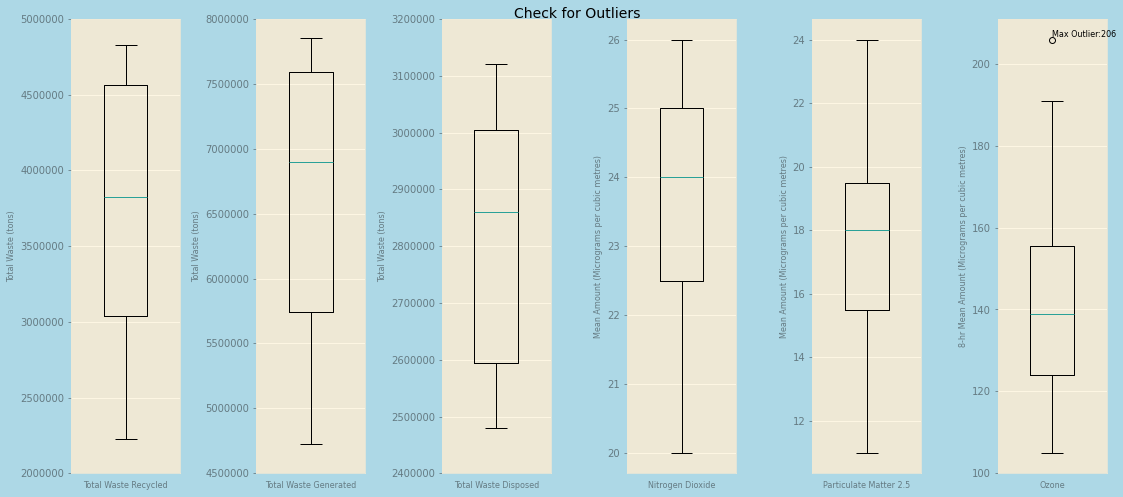

Year with the Max Outlier: 2007


In [12]:
#Show analysis of distribution for waste categories
display(final2.describe().round(0))
print(f'Year with the max total waste generated: {final2["Total Waste Generated"].idxmax()}')
print(f'Year with the min total waste generated: {final2["Total Waste Generated"].idxmin()}')
print(f'Year with the max total waste recycled: {final2["Total Waste Recycled"].idxmax()}')
print(f'Year with the min total waste recycled: {final2["Total Waste Recycled"].idxmin()}')
print(f'Year with the max total waste disposed: {final2["Total Waste Disposed"].idxmax()}')
print(f'Year with the min total waste disposed: {final2["Total Waste Disposed"].idxmin()}')

#Use a stylesheet for the graph
plt.style.use('Solarize_Light2')
#Plotting boxplot to show distribution
fig1, ax1=plt.subplots(1, 6, figsize=(15,7))
fig1.set_facecolor("lightblue")
colCnt=0
for item in final2.columns:
    boxplot=ax1[colCnt].boxplot(x=final2[item], widths=0.4)
    #Get max outliers for Ozone as seen in the boxplot that it is the only category with outliers
    ndarray = boxplot['fliers'][0].get_xydata()
    if (len(ndarray)>0): # will be 0 when no fliers
        max_flier = ndarray[:,1].max()
        max_flier_index = ndarray[:,1].argmax()      
        x = ndarray[max_flier_index,0]
        y = ndarray[max_flier_index,1]    
        plt.text(x,y+0.6,f'Max Outlier:{int(max_flier)}', fontsize=8)
    colCnt+=1
    plt.tight_layout()
ax1[0].set_ylim(2000000,5000000)
ax1[0].set_yticks(np.arange(2000000,5000020, 500000))
ax1[0].set_yticklabels(np.arange(2000000,5000020, 500000))
ax1[1].set_ylim(4500000,8000000)
ax1[1].set_yticks(np.arange(4500000,8000020, 500000))
ax1[1].set_yticklabels(np.arange(4500000,8000020, 500000))
ax1[2].set_ylim(2400000,3200000)
ax1[2].set_yticks(np.arange(2400000,3200020, 100000))
ax1[2].set_yticklabels(np.arange(2400000,3200020, 100000))
ylabels=["Total Waste (tons)", "Total Waste (tons)","Total Waste (tons)", "Mean Amount (Micrograms per cubic metres)", "Mean Amount (Micrograms per cubic metres)","8-hr Mean Amount (Micrograms per cubic metres)"]
for i in range(0,6):
    ax1[i].set_xticks([])
    ax1[i].set_xlabel(final2.columns[i], fontsize=8)
    ax1[i].set_ylabel(ylabels[i], fontsize=8)
fig1.suptitle('Check for Outliers', fontsize=14)
fig1.subplots_adjust(wspace=0.7, hspace=0.4)

plt.show()

#Reveal the years that contains the max and min outliers
year_w_maxOutlier=final2[final2["Ozone"]==max_flier].index[0]
print(f"Year with the Max Outlier: {year_w_maxOutlier}")

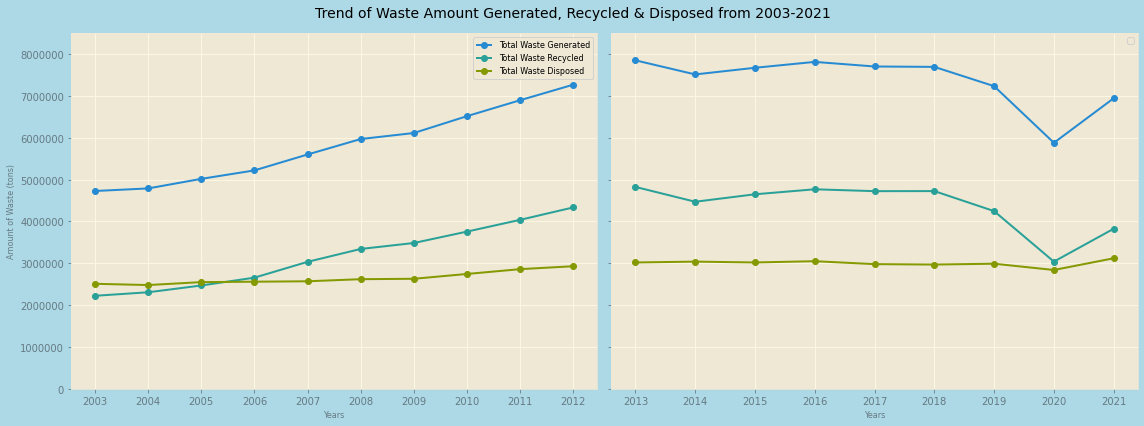

In [13]:
#Show the trend of the amount of waste generated, recycled and disposed
#Line Graph (Comparing Waste Generated, Recycled and Disposed Across 2003-2021)
#Set the figure size and background color
fig, axs = plt.subplots(1,2, figsize=(16,6), sharey=True)
fig.set_facecolor("lightblue")
fig.suptitle("Trend of Waste Amount Generated, Recycled & Disposed from 2003-2021", fontsize=14)
#Plot the line graph using the final2 dataframe
axs[0].plot(final2[["Total Waste Generated","Total Waste Recycled","Total Waste Disposed"]].iloc[:10], linewidth=2, marker='o')
axs[0].set_ylim(0,8500000)
axs[0].set_xticks(np.arange(2003,2013))
axs[0].set_xticklabels(np.arange(2003,2013))
axs[0].set_ylabel("Amount of Waste (tons)", fontsize=8)
axs[0].set_xlabel("Years", fontsize=8)
axs[1].plot(final2[["Total Waste Generated","Total Waste Recycled","Total Waste Disposed"]].iloc[10:], linewidth=2, marker='o')
axs[1].set_xticks(np.arange(2013,2022))
axs[1].set_xticklabels(np.arange(2013,2022))
axs[1].set_xlabel("Years", fontsize=8)

#Create the legend and add it to both subplots
legend = axs[0].legend(["Total Waste Generated","Total Waste Recycled","Total Waste Disposed"], fontsize=8)
axs[1].legend(legend.legendHandles, legend.get_label(), fontsize=8)

#Plotting scale range for y-axis
axs[0].set_ylim(0,8500000)
axs[0].set_yticks(np.arange(0,8500000, 1000000))
axs[0].set_yticklabels(np.arange(0,8500000, 1000000))

plt.tight_layout()
plt.show()


In [14]:
#Use statsmodels to do a linear regression analysis
final2=final2.rename(columns={"Total Waste Disposed":"Total_Waste_Disposed", "Particulate Matter 2.5":"Particulate_Matter_2_5","Nitrogen Dioxide":"Nitrogen_Dioxide"})

#Perform a simple linear regression on Total Waste Disposal & Ozone emitted
print("Ozone Emissions from Waste Disposal")
wasteModel_Ozone = sm.OLS.from_formula("Ozone ~ Total_Waste_Disposed", data=final2).fit()
print(wasteModel_Ozone.params)
print(wasteModel_Ozone.summary())
print()

#Perform a simple linear regression on Total Waste Disposal & Particulate Matter 2.5 emitted
print("Particulate Matter 2.5 Emissions from Waste Disposal")
wasteModel_PM2 = sm.OLS.from_formula("Particulate_Matter_2_5 ~ Total_Waste_Disposed", data=final2).fit()
print(wasteModel_PM2.params)
print(wasteModel_PM2.summary())
print()

#Perform a simple linear regression on Total Waste Disposal & Nitrogen Dioxide emitted
print("Nitrogen Dioxide Emissions from Waste Disposal")
wasteModel_NO2 = sm.OLS.from_formula("Nitrogen_Dioxide ~ Total_Waste_Disposed", data=final2).fit()
print(wasteModel_NO2.params)
print(wasteModel_NO2.summary())
print()

Ozone Emissions from Waste Disposal
Intercept               166.712146
Total_Waste_Disposed     -0.000008
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Ozone   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.055
Method:                 Least Squares   F-statistic:                   0.06189
Date:                Wed, 01 Feb 2023   Prob (F-statistic):              0.807
Time:                        22:38:19   Log-Likelihood:                -89.234
No. Observations:                  19   AIC:                             182.5
Df Residuals:                      17   BIC:                             184.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]


c:\Users\bryan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\bryan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
c:\Users\bryan\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


r=-0.43


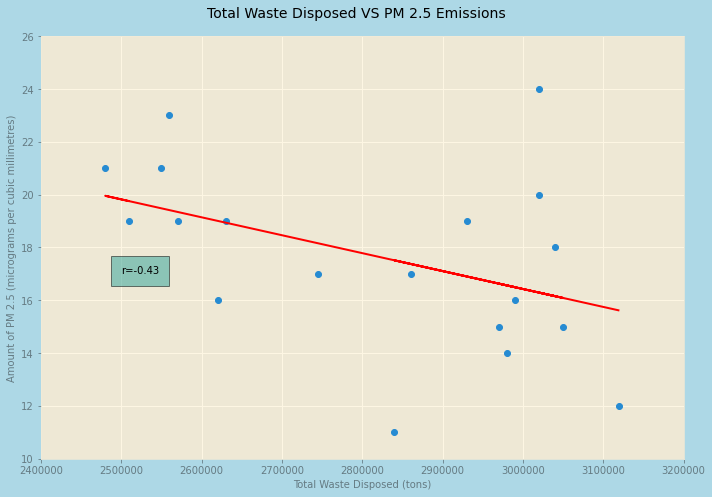

In [15]:
#Plots scatterplot
fig5=plt.figure(1,figsize=(10,7))
fig5.set_facecolor("lightblue")
ax5=plt.subplot(111)
#s is the size of the markers
ax5.scatter(final2["Total_Waste_Disposed"], final2["Particulate_Matter_2_5"])
#Plot the regression line (Least squares polynomial fit)
#deg = degree of fitting polynomial
m,b = np.polyfit(final2["Total_Waste_Disposed"], final2["Particulate_Matter_2_5"], deg=1)
ax5.plot(final2["Total_Waste_Disposed"],m*final2["Total_Waste_Disposed"] + b, 'r-')

plt.xlabel("Total Waste Disposed (tons)", fontsize=10)
plt.ylabel("Amount of PM 2.5 (micrograms per cubic millimetres)", fontsize=10)
plt.xlim(2400000,3200000)
ax5.set_xticks(np.arange(2400000,3200020, 100000))
ax5.set_xticklabels(np.arange(2400000,3200020, 100000))
plt.ylim(10,26)
ax5.set_yticks(np.arange(10,27, 2))
ax5.set_yticklabels(np.arange(10,27, 2))
fig5.suptitle('Total Waste Disposed VS PM 2.5 Emissions', fontsize=14)

#Find the correlation coefficient of the two variables
corelation_coeff = np.corrcoef(final2["Total_Waste_Disposed"],final2["Particulate_Matter_2_5"])[0,1**2]
print(f"r={corelation_coeff:.2f}")
string="r="+str(round(corelation_coeff,2))

#Insert text of correlation coefficient with a box as a background
ax5.text(2500000, 17, string, fontsize=10,bbox={'facecolor':'#2aa198', 'alpha':0.5, 'pad':10})

plt.tight_layout()
plt.show()
